In [274]:
# install ucimlrepo, pandas, matplotlib packages

from ucimlrepo import fetch_ucirepo 

In [275]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
x = adult.data.features 
y = adult.data.targets 

# shape of data
x.shape, y.shape

((48842, 14), (48842, 1))

In [276]:
# look for null values, data types
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [277]:
# look for null values, data types
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [278]:
import pandas as pd

In [279]:
df = pd.concat([x, y], axis=1)
df.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6652,29,Private,177413,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
21958,43,Private,117915,Masters,14,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
43548,34,Private,35743,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K.


In [280]:
# view unique values with value counts
df['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [281]:
def process_income(income):
    if income == '<=50K.':
        return '<=50K'
    elif income == '>50K.':
        return '>50K'
    else: 
        return income
    
df['income'] = df['income'].apply(process_income)
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [282]:
import seaborn as sns

<Axes: >

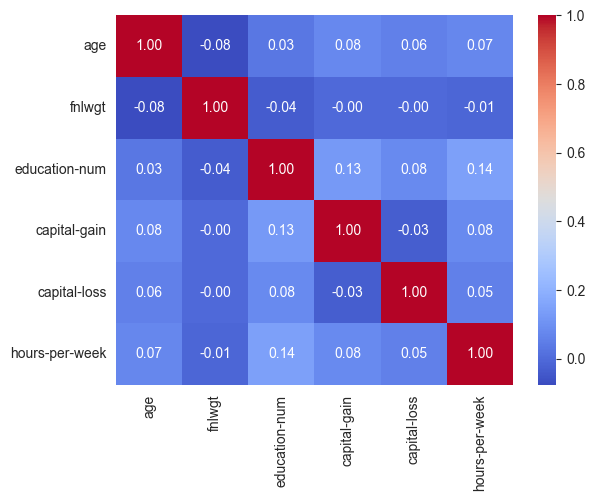

In [283]:
neumerical_features = df.select_dtypes(include=['int64', 'float64'])
corr_metrics = neumerical_features.corr()
sns.heatmap(corr_metrics, annot=True, fmt='.2f', cmap='coolwarm')

In [284]:
df = df.drop(columns=['fnlwgt'])

In [285]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [286]:
from matplotlib import pyplot as plt

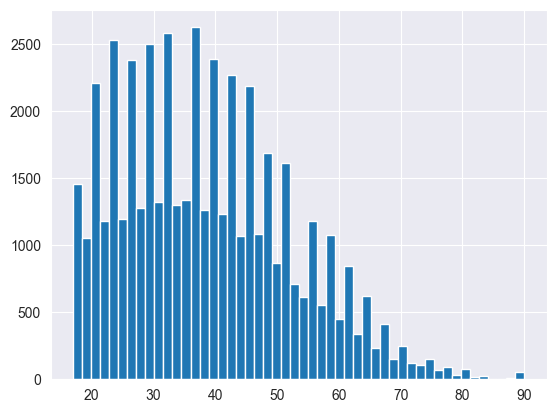

In [287]:
plt.hist(df['age'], bins=50)
plt.show()

In [288]:
(df['age'] > 80).sum()

148

In [289]:
age_filter_1 = df['age'] > 80
df.loc[age_filter_1]['age'].value_counts()

age
90    55
81    37
82    15
84    13
83    11
88     6
85     5
87     3
89     2
86     1
Name: count, dtype: int64

In [290]:
age_filter_2 = df['age'] > 80
age_filter_3 = df['age'] < 90
df.loc[age_filter_2 & age_filter_3, 'age'] = (80 + 90)/ 2
df.loc[age_filter_1]['age'].value_counts()

age
85    93
90    55
Name: count, dtype: int64

In [291]:
df['workclass'].fillna('Unknown', inplace=True)

/var/folders/p1/plqqz3vn75d873bd3kj4mtgw0000gn/T/ipykernel_33054/781229096.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna('Unknown', inplace=True)


In [292]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Unknown               963
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [293]:
workclass_filt_1 = df['workclass'] == 'Without-pay'
workclass_filt_2 = df['workclass'] == 'Never-worked'

df.loc[workclass_filt_1 | workclass_filt_2, 'income'].value_counts()

income
<=50K    29
>50K      2
Name: count, dtype: int64

In [294]:
indices = df[(workclass_filt_1 | workclass_filt_2) & (df['income'] == '>50K')].index
df = df.drop(indices)
df.shape

(48840, 14)

In [295]:
def process_workclass(workclass):
    if workclass == '?':
        return 'Unknown'
    elif workclass in ['Without-pay', 'Never-worked']:
        return 'Unemployed'
    else:
        return workclass
    
df['workclass'] = df['workclass'].apply(process_workclass)
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Unemployed             29
Name: count, dtype: int64

In [296]:
df['education'].value_counts()

education
HS-grad         15782
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [297]:
filt_preschool = (df['education'] == 'Preschool')
df.loc[filt_preschool, 'income'].value_counts()

income
<=50K    82
>50K      1
Name: count, dtype: int64

In [298]:
filt_preschool_50 = (df['education'] == 'Preschool') & (df['income'] == '>50K')
df.loc[filt_preschool_50]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48525,61,Private,Preschool,1,Separated,Transport-moving,Not-in-family,Black,Male,14344,0,40,United-States,>50K


In [299]:
df = df[~filt_preschool]

In [300]:
filt_1_4 = df['education'] == '1st-4th'
df.loc[filt_1_4, 'income'].value_counts()

income
<=50K    239
>50K       8
Name: count, dtype: int64

In [301]:
filt_1_4_50 = (df['education'] == '1st-4th') & (df['income'] == '>50K')
df.loc[filt_1_4_50]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2817,41,Private,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,>50K
10264,52,Private,1st-4th,2,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,56,Mexico,>50K
13682,52,Private,1st-4th,2,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
19576,53,Self-emp-not-inc,1st-4th,2,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,67,Italy,>50K
21097,54,Private,1st-4th,2,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,Haiti,>50K
29322,60,Private,1st-4th,2,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,>50K
33451,42,Private,1st-4th,2,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,55,Portugal,>50K
40935,61,Private,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,60,United-States,>50K


In [302]:
def process_education(education):
    if education in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        return 'Other'
    else:
        return education
    
df['education'] = df['education'].apply(process_education)

In [303]:
df['education-num'].value_counts()

education-num
9     15782
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
Name: count, dtype: int64

In [304]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22347
Never-married            16079
Divorced                  6631
Separated                 1527
Widowed                   1513
Married-spouse-absent      623
Married-AF-spouse           37
Name: count, dtype: int64

In [305]:
filt_af_spouse = df['marital-status'] == 'Married-AF-spouse'
df.loc[filt_af_spouse, 'income'].value_counts()

income
<=50K    23
>50K     14
Name: count, dtype: int64

In [306]:
df['occupation'].value_counts()

occupation
Prof-specialty       6171
Craft-repair         6106
Exec-managerial      6085
Adm-clerical         5608
Sales                5502
Other-service        4901
Machine-op-inspct    3009
Transport-moving     2353
Handlers-cleaners    2066
?                    1838
Farming-fishing      1473
Tech-support         1446
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [307]:
df['occupation'].fillna('Unknown', inplace=True)

/var/folders/p1/plqqz3vn75d873bd3kj4mtgw0000gn/T/ipykernel_33054/2116681980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].fillna('Unknown', inplace=True)


In [308]:
df['occupation'] = df['occupation'].apply(lambda x : 'Unknown' if x == '?' else x)

In [309]:
filt_af = df['occupation'] == 'Armed-Forces'
df.loc[filt_af, 'income'].value_counts()

income
<=50K    10
>50K      5
Name: count, dtype: int64

In [310]:
df['relationship'].value_counts()

relationship
Husband           19692
Not-in-family     12545
Own-child          7573
Unmarried          5119
Wife               2328
Other-relative     1500
Name: count, dtype: int64

In [311]:
filt_unmarried = df['relationship'] == 'Unmarried'
df.loc[filt_unmarried, 'marital-status'].value_counts()

marital-status
Divorced                 2368
Never-married            1331
Separated                 667
Widowed                   571
Married-spouse-absent     182
Name: count, dtype: int64

In [312]:
df['race'].value_counts()

race
White                 41699
Black                  4673
Asian-Pac-Islander     1512
Amer-Indian-Eskimo      469
Other                   404
Name: count, dtype: int64

In [313]:
df['sex'].value_counts()

sex
Male      32590
Female    16167
Name: count, dtype: int64

In [314]:
df['capital-gain'].describe()

count    48757.000000
mean      1079.702709
std       7455.898062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [315]:
(df['capital-loss'] == 0).sum()

46478

{'whiskers': [<matplotlib.lines.Line2D at 0x28bcda070>,
 'caps': [<matplotlib.lines.Line2D at 0x28bcda5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28bcccd90>],
 'medians': [<matplotlib.lines.Line2D at 0x28bcdaaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28bcdad90>],
 'means': []}

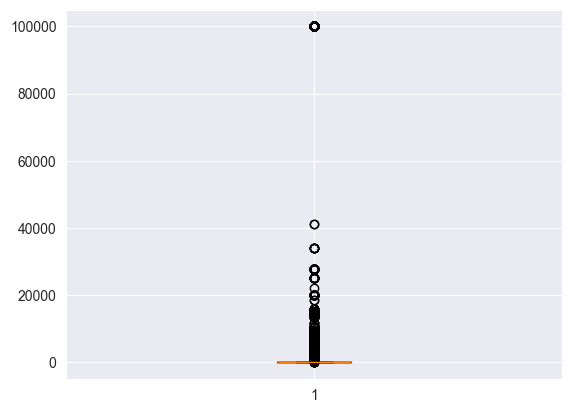

In [316]:
plt.boxplot(df['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28bd36f40>,
 'caps': [<matplotlib.lines.Line2D at 0x28bd444c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28bd36ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x28bd448e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28bd44b80>],
 'means': []}

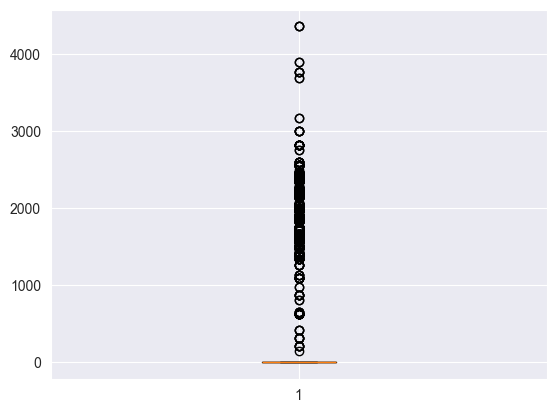

In [317]:
plt.boxplot(df['capital-loss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28bda54f0>,
 'caps': [<matplotlib.lines.Line2D at 0x28bda5910>,
 'boxes': [<matplotlib.lines.Line2D at 0x28bda5250>],
 'medians': [<matplotlib.lines.Line2D at 0x28bda5e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x28bdb3130>],
 'means': []}

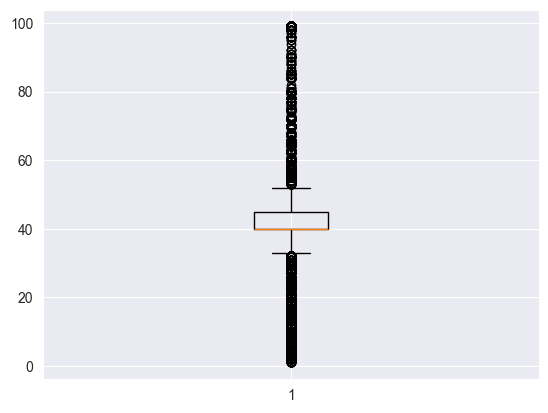

In [318]:
plt.boxplot(df['hours-per-week'])

In [319]:
df['race'].value_counts()

race
White                 41699
Black                  4673
Asian-Pac-Islander     1512
Amer-Indian-Eskimo      469
Other                   404
Name: count, dtype: int64

In [320]:
df['hours-per-week'].describe()

count    48757.000000
mean        40.428554
std         12.392033
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [321]:
df['native-country'].value_counts()

native-country
United-States                 43806
Mexico                          920
?                               582
Philippines                     293
Germany                         206
Puerto-Rico                     183
Canada                          182
India                           150
El-Salvador                     148
Cuba                            138
England                         127
China                           120
South                           114
Italy                           105
Jamaica                         105
Dominican-Republic              101
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            71
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        48
Peru         

In [322]:
df['native-country'] = df['native-country'].apply(lambda x : x if x == 'United-States' else 'Other')

In [323]:
df['native-country'].value_counts()

native-country
United-States    43806
Other             4951
Name: count, dtype: int64

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48757 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48757 non-null  int64 
 1   workclass       48757 non-null  object
 2   education       48757 non-null  object
 3   education-num   48757 non-null  int64 
 4   marital-status  48757 non-null  object
 5   occupation      48757 non-null  object
 6   relationship    48757 non-null  object
 7   race            48757 non-null  object
 8   sex             48757 non-null  object
 9   capital-gain    48757 non-null  int64 
 10  capital-loss    48757 non-null  int64 
 11  hours-per-week  48757 non-null  int64 
 12  native-country  48757 non-null  object
 13  income          48757 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.6+ MB


In [325]:
df = df.drop(columns=['capital-gain', 'capital-loss'])
x = df.drop(columns=['income', 'education'])
y = df['income']

In [326]:
from imblearn.over_sampling import RandomOverSampler

In [327]:
oversample = RandomOverSampler(random_state=42)
x, y = oversample.fit_resample(x, y)
y.value_counts()

income
<=50K    37073
>50K     37073
Name: count, dtype: int64

In [328]:
x = pd.get_dummies(x)

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

((51902, 48), (22244, 48))

In [331]:
from sklearn.naive_bayes import MultinomialNB

In [332]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [333]:
pred = model.predict(x_test)
pred

array(['>50K', '>50K', '<=50K', ..., '<=50K', '>50K', '>50K'], dtype='<U5')

In [334]:
y_test

5860      >50K
35675    <=50K
32549    <=50K
43983    <=50K
16234    <=50K
         ...  
36049     >50K
59172     >50K
58467     >50K
32131     >50K
72957     >50K
Name: income, Length: 22244, dtype: object

In [335]:
from sklearn.metrics import accuracy_score

In [336]:
accuracy_score(y_test,pred)

0.7654198885092609

In [337]:
from sklearn.ensemble import RandomForestClassifier

Text(0, 0.5, 'Accuracy')

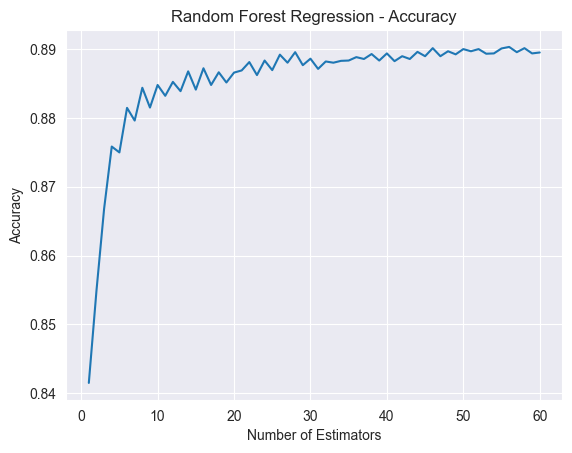

In [340]:
test_acc_list = []

for i in range(1, 61):
    model = RandomForestClassifier(n_estimators=i, random_state=42)
    model.fit(x_train, y_train)
    
    # Testing set
    test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

plt.plot(range(1, 61), test_acc_list)
plt.title('Random Forest Regression - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

In [341]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(x_train, y_train)
test_pred = model.predict(x_test)
accuracy_score(y_test, test_pred)

0.8899928070490919